In [1]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = '../data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = '../data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = '../data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [3]:
#Define NN architecture

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Dropout(0.3))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dropout(0.4))
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 135, 135, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        8

In [4]:
# compile the model
from tensorflow.keras.optimizers import RMSprop

piece_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='piece_model1.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=1500, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/1500

Epoch 00001: val_loss improved from inf to 2.06374, saving model to piece_model1.weights.best.hdf5
39/38 - 22s - loss: 1.9017 - accuracy: 0.2184 - val_loss: 2.0637 - val_accuracy: 0.1511
Epoch 2/1500

Epoch 00002: val_loss did not improve from 2.06374
39/38 - 14s - loss: 1.8284 - accuracy: 0.2510 - val_loss: 2.0772 - val_accuracy: 0.1511
Epoch 3/1500

Epoch 00003: val_loss did not improve from 2.06374
39/38 - 14s - loss: 1.7900 - accuracy: 0.2755 - val_loss: 2.1099 - val_accuracy: 0.1511
Epoch 4/1500

Epoch 00004: val_loss did not improve from 2.06374
39/38 - 13s - loss: 1.7626 - accuracy: 0.2747 - val_loss: 2.2205 - val_accuracy: 0.1511
Epoch 5/1500

Epoch 00005: val_loss did not improve from 2.06374
39/38 - 14s - loss: 1.7164 - accuracy: 0.3073 - val_loss: 2.3962 - val_accuracy: 0.1511
Epoch 6/1500

Epoch 00006: val_loss did not improve from 2.06374
39/38 - 13s - loss: 1.6898 - accuracy: 0.3268 - val_loss: 2.6402 - val_accuracy: 0.1511
Epoch 7/1500

Epoch 00007: val_los

Epoch 48/1500

Epoch 00048: val_loss did not improve from 1.47661
39/38 - 13s - loss: 1.2993 - accuracy: 0.5020 - val_loss: 1.4839 - val_accuracy: 0.3988
Epoch 49/1500

Epoch 00049: val_loss improved from 1.47661 to 1.44482, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.2761 - accuracy: 0.5020 - val_loss: 1.4448 - val_accuracy: 0.4048
Epoch 50/1500

Epoch 00050: val_loss improved from 1.44482 to 1.44461, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.2995 - accuracy: 0.4923 - val_loss: 1.4446 - val_accuracy: 0.4018
Epoch 51/1500

Epoch 00051: val_loss did not improve from 1.44461
39/38 - 13s - loss: 1.2757 - accuracy: 0.5020 - val_loss: 1.4531 - val_accuracy: 0.4079
Epoch 52/1500

Epoch 00052: val_loss improved from 1.44461 to 1.43893, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.2839 - accuracy: 0.4898 - val_loss: 1.4389 - val_accuracy: 0.4018
Epoch 53/1500

Epoch 00053: val_loss improved from 1.43893 to 1.43505, sav

39/38 - 14s - loss: 1.1626 - accuracy: 0.5526 - val_loss: 1.2585 - val_accuracy: 0.4743
Epoch 95/1500

Epoch 00095: val_loss improved from 1.25854 to 1.25799, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.1128 - accuracy: 0.5721 - val_loss: 1.2580 - val_accuracy: 0.4955
Epoch 96/1500

Epoch 00096: val_loss did not improve from 1.25799
39/38 - 14s - loss: 1.1333 - accuracy: 0.5729 - val_loss: 1.2734 - val_accuracy: 0.4804
Epoch 97/1500

Epoch 00097: val_loss did not improve from 1.25799
39/38 - 13s - loss: 1.1601 - accuracy: 0.5363 - val_loss: 1.2615 - val_accuracy: 0.4985
Epoch 98/1500

Epoch 00098: val_loss improved from 1.25799 to 1.24678, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.1466 - accuracy: 0.5811 - val_loss: 1.2468 - val_accuracy: 0.4985
Epoch 99/1500

Epoch 00099: val_loss did not improve from 1.24678
39/38 - 13s - loss: 1.1063 - accuracy: 0.5868 - val_loss: 1.2544 - val_accuracy: 0.4955
Epoch 100/1500

Epoch 00100: val_loss 

Epoch 142/1500

Epoch 00142: val_loss did not improve from 1.10133
39/38 - 13s - loss: 0.9933 - accuracy: 0.6088 - val_loss: 1.1070 - val_accuracy: 0.6012
Epoch 143/1500

Epoch 00143: val_loss did not improve from 1.10133
39/38 - 13s - loss: 0.9913 - accuracy: 0.6186 - val_loss: 1.1014 - val_accuracy: 0.6073
Epoch 144/1500

Epoch 00144: val_loss improved from 1.10133 to 1.09879, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.9859 - accuracy: 0.6112 - val_loss: 1.0988 - val_accuracy: 0.6163
Epoch 145/1500

Epoch 00145: val_loss did not improve from 1.09879
39/38 - 13s - loss: 0.9959 - accuracy: 0.6300 - val_loss: 1.1038 - val_accuracy: 0.6012
Epoch 146/1500

Epoch 00146: val_loss improved from 1.09879 to 1.09054, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 1.0265 - accuracy: 0.6186 - val_loss: 1.0905 - val_accuracy: 0.6163
Epoch 147/1500

Epoch 00147: val_loss improved from 1.09054 to 1.08813, saving model to piece_model1.weights.best.hdf5
39

Epoch 193/1500

Epoch 00193: val_loss did not improve from 0.94816
39/38 - 14s - loss: 0.9117 - accuracy: 0.6520 - val_loss: 0.9638 - val_accuracy: 0.6495
Epoch 194/1500

Epoch 00194: val_loss did not improve from 0.94816
39/38 - 13s - loss: 0.8650 - accuracy: 0.6634 - val_loss: 0.9647 - val_accuracy: 0.6405
Epoch 195/1500

Epoch 00195: val_loss did not improve from 0.94816
39/38 - 14s - loss: 0.8814 - accuracy: 0.6561 - val_loss: 0.9643 - val_accuracy: 0.6435
Epoch 196/1500

Epoch 00196: val_loss improved from 0.94816 to 0.93938, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.8496 - accuracy: 0.6675 - val_loss: 0.9394 - val_accuracy: 0.6375
Epoch 197/1500

Epoch 00197: val_loss did not improve from 0.93938
39/38 - 13s - loss: 0.8814 - accuracy: 0.6463 - val_loss: 1.0053 - val_accuracy: 0.6193
Epoch 198/1500

Epoch 00198: val_loss improved from 0.93938 to 0.93723, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.8877 - accuracy: 0.6577 - val_lo

Epoch 250/1500

Epoch 00250: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7980 - accuracy: 0.7107 - val_loss: 0.8712 - val_accuracy: 0.6707
Epoch 251/1500

Epoch 00251: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7717 - accuracy: 0.7050 - val_loss: 0.8509 - val_accuracy: 0.6737
Epoch 252/1500

Epoch 00252: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7622 - accuracy: 0.7205 - val_loss: 0.8720 - val_accuracy: 0.6828
Epoch 253/1500

Epoch 00253: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7446 - accuracy: 0.7123 - val_loss: 0.8441 - val_accuracy: 0.6949
Epoch 254/1500

Epoch 00254: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7803 - accuracy: 0.6936 - val_loss: 0.8642 - val_accuracy: 0.6888
Epoch 255/1500

Epoch 00255: val_loss did not improve from 0.83241
39/38 - 13s - loss: 0.7555 - accuracy: 0.7229 - val_loss: 0.8729 - val_accuracy: 0.6737
Epoch 256/1500

Epoch 00256: val_loss did not improve from 0.83241
39/

Epoch 302/1500

Epoch 00302: val_loss improved from 0.76153 to 0.76064, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.7137 - accuracy: 0.7311 - val_loss: 0.7606 - val_accuracy: 0.7130
Epoch 303/1500

Epoch 00303: val_loss improved from 0.76064 to 0.73584, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.7322 - accuracy: 0.7311 - val_loss: 0.7358 - val_accuracy: 0.7130
Epoch 304/1500

Epoch 00304: val_loss improved from 0.73584 to 0.72954, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.6787 - accuracy: 0.7319 - val_loss: 0.7295 - val_accuracy: 0.7160
Epoch 305/1500

Epoch 00305: val_loss did not improve from 0.72954
39/38 - 13s - loss: 0.7407 - accuracy: 0.7359 - val_loss: 0.7710 - val_accuracy: 0.7402
Epoch 306/1500

Epoch 00306: val_loss did not improve from 0.72954
39/38 - 13s - loss: 0.6789 - accuracy: 0.7612 - val_loss: 0.7817 - val_accuracy: 0.7160
Epoch 307/1500

Epoch 00307: val_loss did not improve from 0.72954
39

39/38 - 14s - loss: 0.6166 - accuracy: 0.7571 - val_loss: 0.6577 - val_accuracy: 0.7674
Epoch 353/1500

Epoch 00353: val_loss did not improve from 0.65767
39/38 - 13s - loss: 0.6381 - accuracy: 0.7620 - val_loss: 0.6699 - val_accuracy: 0.7583
Epoch 354/1500

Epoch 00354: val_loss did not improve from 0.65767
39/38 - 14s - loss: 0.7068 - accuracy: 0.7449 - val_loss: 0.6912 - val_accuracy: 0.7372
Epoch 355/1500

Epoch 00355: val_loss did not improve from 0.65767
39/38 - 13s - loss: 0.6167 - accuracy: 0.7669 - val_loss: 0.7164 - val_accuracy: 0.7613
Epoch 356/1500

Epoch 00356: val_loss did not improve from 0.65767
39/38 - 13s - loss: 0.6694 - accuracy: 0.7416 - val_loss: 0.7307 - val_accuracy: 0.7583
Epoch 357/1500

Epoch 00357: val_loss did not improve from 0.65767
39/38 - 13s - loss: 0.6120 - accuracy: 0.7685 - val_loss: 0.7262 - val_accuracy: 0.7462
Epoch 358/1500

Epoch 00358: val_loss did not improve from 0.65767
39/38 - 14s - loss: 0.6182 - accuracy: 0.7759 - val_loss: 0.7484 - val

Epoch 404/1500

Epoch 00404: val_loss did not improve from 0.61106
39/38 - 13s - loss: 0.5596 - accuracy: 0.7881 - val_loss: 0.6701 - val_accuracy: 0.7583
Epoch 405/1500

Epoch 00405: val_loss improved from 0.61106 to 0.60826, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.5794 - accuracy: 0.7759 - val_loss: 0.6083 - val_accuracy: 0.7915
Epoch 406/1500

Epoch 00406: val_loss did not improve from 0.60826
39/38 - 13s - loss: 0.5818 - accuracy: 0.7832 - val_loss: 0.6091 - val_accuracy: 0.7734
Epoch 407/1500

Epoch 00407: val_loss did not improve from 0.60826
39/38 - 13s - loss: 0.5957 - accuracy: 0.7832 - val_loss: 0.6214 - val_accuracy: 0.7915
Epoch 408/1500

Epoch 00408: val_loss did not improve from 0.60826
39/38 - 14s - loss: 0.5411 - accuracy: 0.7922 - val_loss: 0.6238 - val_accuracy: 0.7855
Epoch 409/1500

Epoch 00409: val_loss did not improve from 0.60826
39/38 - 13s - loss: 0.6142 - accuracy: 0.7620 - val_loss: 0.6354 - val_accuracy: 0.7734
Epoch 410/1500

Ep

Epoch 456/1500

Epoch 00456: val_loss improved from 0.55786 to 0.55300, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.5535 - accuracy: 0.7881 - val_loss: 0.5530 - val_accuracy: 0.7946
Epoch 457/1500

Epoch 00457: val_loss did not improve from 0.55300
39/38 - 13s - loss: 0.5084 - accuracy: 0.8011 - val_loss: 0.5667 - val_accuracy: 0.7976
Epoch 458/1500

Epoch 00458: val_loss did not improve from 0.55300
39/38 - 14s - loss: 0.5196 - accuracy: 0.8109 - val_loss: 0.5708 - val_accuracy: 0.7885
Epoch 459/1500

Epoch 00459: val_loss did not improve from 0.55300
39/38 - 13s - loss: 0.5293 - accuracy: 0.8077 - val_loss: 0.6127 - val_accuracy: 0.7704
Epoch 460/1500

Epoch 00460: val_loss did not improve from 0.55300
39/38 - 13s - loss: 0.4996 - accuracy: 0.8093 - val_loss: 0.5849 - val_accuracy: 0.8036
Epoch 461/1500

Epoch 00461: val_loss did not improve from 0.55300
39/38 - 13s - loss: 0.5386 - accuracy: 0.7865 - val_loss: 0.5602 - val_accuracy: 0.7976
Epoch 462/1500

Ep

Epoch 507/1500

Epoch 00507: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.5047 - accuracy: 0.8011 - val_loss: 0.5719 - val_accuracy: 0.7946
Epoch 508/1500

Epoch 00508: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.4917 - accuracy: 0.8174 - val_loss: 0.5629 - val_accuracy: 0.8097
Epoch 509/1500

Epoch 00509: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.5597 - accuracy: 0.8068 - val_loss: 0.5363 - val_accuracy: 0.8097
Epoch 510/1500

Epoch 00510: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.4958 - accuracy: 0.8223 - val_loss: 0.5352 - val_accuracy: 0.8097
Epoch 511/1500

Epoch 00511: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.4759 - accuracy: 0.8223 - val_loss: 0.5494 - val_accuracy: 0.8066
Epoch 512/1500

Epoch 00512: val_loss did not improve from 0.53367
39/38 - 13s - loss: 0.5036 - accuracy: 0.8052 - val_loss: 0.5850 - val_accuracy: 0.8097
Epoch 513/1500

Epoch 00513: val_loss did not improve from 0.53367
39/

Epoch 559/1500

Epoch 00559: val_loss did not improve from 0.51067
39/38 - 14s - loss: 0.4519 - accuracy: 0.8386 - val_loss: 0.5614 - val_accuracy: 0.8248
Epoch 560/1500

Epoch 00560: val_loss did not improve from 0.51067
39/38 - 13s - loss: 0.4471 - accuracy: 0.8435 - val_loss: 0.6188 - val_accuracy: 0.8218
Epoch 561/1500

Epoch 00561: val_loss did not improve from 0.51067
39/38 - 14s - loss: 0.4697 - accuracy: 0.8199 - val_loss: 0.6141 - val_accuracy: 0.8218
Epoch 562/1500

Epoch 00562: val_loss did not improve from 0.51067
39/38 - 14s - loss: 0.4374 - accuracy: 0.8370 - val_loss: 0.5167 - val_accuracy: 0.8278
Epoch 563/1500

Epoch 00563: val_loss did not improve from 0.51067
39/38 - 13s - loss: 0.4639 - accuracy: 0.8321 - val_loss: 0.5156 - val_accuracy: 0.8278
Epoch 564/1500

Epoch 00564: val_loss did not improve from 0.51067
39/38 - 13s - loss: 0.4705 - accuracy: 0.8289 - val_loss: 0.5236 - val_accuracy: 0.8248
Epoch 565/1500

Epoch 00565: val_loss did not improve from 0.51067
39/

Epoch 611/1500

Epoch 00611: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4183 - accuracy: 0.8435 - val_loss: 0.6157 - val_accuracy: 0.7976
Epoch 612/1500

Epoch 00612: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4373 - accuracy: 0.8403 - val_loss: 0.6138 - val_accuracy: 0.8006
Epoch 613/1500

Epoch 00613: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4488 - accuracy: 0.8394 - val_loss: 0.5428 - val_accuracy: 0.8278
Epoch 614/1500

Epoch 00614: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4040 - accuracy: 0.8517 - val_loss: 0.5430 - val_accuracy: 0.8338
Epoch 615/1500

Epoch 00615: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4260 - accuracy: 0.8517 - val_loss: 0.5688 - val_accuracy: 0.8308
Epoch 616/1500

Epoch 00616: val_loss did not improve from 0.49835
39/38 - 13s - loss: 0.4037 - accuracy: 0.8403 - val_loss: 0.5926 - val_accuracy: 0.8187
Epoch 617/1500

Epoch 00617: val_loss did not improve from 0.49835
39/

Epoch 664/1500

Epoch 00664: val_loss did not improve from 0.46415
39/38 - 13s - loss: 0.4250 - accuracy: 0.8370 - val_loss: 0.5526 - val_accuracy: 0.8036
Epoch 665/1500

Epoch 00665: val_loss did not improve from 0.46415
39/38 - 14s - loss: 0.4161 - accuracy: 0.8460 - val_loss: 0.4985 - val_accuracy: 0.8429
Epoch 666/1500

Epoch 00666: val_loss did not improve from 0.46415
39/38 - 14s - loss: 0.4225 - accuracy: 0.8484 - val_loss: 0.4673 - val_accuracy: 0.8459
Epoch 667/1500

Epoch 00667: val_loss did not improve from 0.46415
39/38 - 13s - loss: 0.4414 - accuracy: 0.8394 - val_loss: 0.5014 - val_accuracy: 0.8338
Epoch 668/1500

Epoch 00668: val_loss did not improve from 0.46415
39/38 - 13s - loss: 0.4049 - accuracy: 0.8427 - val_loss: 0.4856 - val_accuracy: 0.8399
Epoch 669/1500

Epoch 00669: val_loss did not improve from 0.46415
39/38 - 13s - loss: 0.4130 - accuracy: 0.8435 - val_loss: 0.5129 - val_accuracy: 0.8369
Epoch 670/1500

Epoch 00670: val_loss did not improve from 0.46415
39/

Epoch 717/1500

Epoch 00717: val_loss improved from 0.45715 to 0.43516, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.3816 - accuracy: 0.8525 - val_loss: 0.4352 - val_accuracy: 0.8429
Epoch 718/1500

Epoch 00718: val_loss did not improve from 0.43516
39/38 - 14s - loss: 0.3593 - accuracy: 0.8541 - val_loss: 0.4708 - val_accuracy: 0.8459
Epoch 719/1500

Epoch 00719: val_loss did not improve from 0.43516
39/38 - 14s - loss: 0.3973 - accuracy: 0.8452 - val_loss: 0.4451 - val_accuracy: 0.8429
Epoch 720/1500

Epoch 00720: val_loss did not improve from 0.43516
39/38 - 14s - loss: 0.3851 - accuracy: 0.8509 - val_loss: 0.4913 - val_accuracy: 0.8489
Epoch 721/1500

Epoch 00721: val_loss did not improve from 0.43516
39/38 - 13s - loss: 0.3488 - accuracy: 0.8704 - val_loss: 0.6073 - val_accuracy: 0.7976
Epoch 722/1500

Epoch 00722: val_loss did not improve from 0.43516
39/38 - 13s - loss: 0.3933 - accuracy: 0.8598 - val_loss: 0.4839 - val_accuracy: 0.8308
Epoch 723/1500

Ep

Epoch 769/1500

Epoch 00769: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3224 - accuracy: 0.8818 - val_loss: 0.5350 - val_accuracy: 0.7976
Epoch 770/1500

Epoch 00770: val_loss did not improve from 0.40312
39/38 - 14s - loss: 0.3856 - accuracy: 0.8606 - val_loss: 0.4929 - val_accuracy: 0.8489
Epoch 771/1500

Epoch 00771: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3642 - accuracy: 0.8598 - val_loss: 0.4607 - val_accuracy: 0.8459
Epoch 772/1500

Epoch 00772: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3542 - accuracy: 0.8712 - val_loss: 0.4940 - val_accuracy: 0.8399
Epoch 773/1500

Epoch 00773: val_loss did not improve from 0.40312
39/38 - 14s - loss: 0.3720 - accuracy: 0.8655 - val_loss: 0.4660 - val_accuracy: 0.8580
Epoch 774/1500

Epoch 00774: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3498 - accuracy: 0.8598 - val_loss: 0.4561 - val_accuracy: 0.8489
Epoch 775/1500

Epoch 00775: val_loss did not improve from 0.40312
39/

Epoch 822/1500

Epoch 00822: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3846 - accuracy: 0.8623 - val_loss: 0.4781 - val_accuracy: 0.8429
Epoch 823/1500

Epoch 00823: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3401 - accuracy: 0.8712 - val_loss: 0.4560 - val_accuracy: 0.8610
Epoch 824/1500

Epoch 00824: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3347 - accuracy: 0.8737 - val_loss: 0.4151 - val_accuracy: 0.8640
Epoch 825/1500

Epoch 00825: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3233 - accuracy: 0.8778 - val_loss: 0.4593 - val_accuracy: 0.8580
Epoch 826/1500

Epoch 00826: val_loss did not improve from 0.40312
39/38 - 13s - loss: 0.3501 - accuracy: 0.8802 - val_loss: 0.4376 - val_accuracy: 0.8701
Epoch 827/1500

Epoch 00827: val_loss did not improve from 0.40312
39/38 - 14s - loss: 0.3494 - accuracy: 0.8696 - val_loss: 0.4375 - val_accuracy: 0.8550
Epoch 828/1500

Epoch 00828: val_loss did not improve from 0.40312
39/

Epoch 875/1500

Epoch 00875: val_loss did not improve from 0.38944
39/38 - 13s - loss: 0.3379 - accuracy: 0.8761 - val_loss: 0.4616 - val_accuracy: 0.8610
Epoch 876/1500

Epoch 00876: val_loss did not improve from 0.38944
39/38 - 13s - loss: 0.3461 - accuracy: 0.8802 - val_loss: 0.5073 - val_accuracy: 0.8278
Epoch 877/1500

Epoch 00877: val_loss did not improve from 0.38944
39/38 - 13s - loss: 0.3627 - accuracy: 0.8623 - val_loss: 0.4454 - val_accuracy: 0.8429
Epoch 878/1500

Epoch 00878: val_loss did not improve from 0.38944
39/38 - 13s - loss: 0.2952 - accuracy: 0.8916 - val_loss: 0.5538 - val_accuracy: 0.8157
Epoch 879/1500

Epoch 00879: val_loss improved from 0.38944 to 0.38438, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.3396 - accuracy: 0.8802 - val_loss: 0.3844 - val_accuracy: 0.8610
Epoch 880/1500

Epoch 00880: val_loss did not improve from 0.38438
39/38 - 14s - loss: 0.3298 - accuracy: 0.8900 - val_loss: 0.4773 - val_accuracy: 0.8248
Epoch 881/1500

Ep

Epoch 928/1500

Epoch 00928: val_loss did not improve from 0.38241
39/38 - 13s - loss: 0.3101 - accuracy: 0.8867 - val_loss: 0.4585 - val_accuracy: 0.8550
Epoch 929/1500

Epoch 00929: val_loss did not improve from 0.38241
39/38 - 14s - loss: 0.2939 - accuracy: 0.8924 - val_loss: 0.4463 - val_accuracy: 0.8580
Epoch 930/1500

Epoch 00930: val_loss did not improve from 0.38241
39/38 - 14s - loss: 0.3221 - accuracy: 0.8794 - val_loss: 0.4004 - val_accuracy: 0.8792
Epoch 931/1500

Epoch 00931: val_loss improved from 0.38241 to 0.37791, saving model to piece_model1.weights.best.hdf5
39/38 - 14s - loss: 0.2924 - accuracy: 0.8916 - val_loss: 0.3779 - val_accuracy: 0.8852
Epoch 932/1500

Epoch 00932: val_loss did not improve from 0.37791
39/38 - 14s - loss: 0.3043 - accuracy: 0.8941 - val_loss: 0.4194 - val_accuracy: 0.8580
Epoch 933/1500

Epoch 00933: val_loss did not improve from 0.37791
39/38 - 13s - loss: 0.3126 - accuracy: 0.8965 - val_loss: 0.4647 - val_accuracy: 0.8580
Epoch 934/1500

Ep

Epoch 980/1500

Epoch 00980: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2906 - accuracy: 0.8989 - val_loss: 0.3891 - val_accuracy: 0.8701
Epoch 981/1500

Epoch 00981: val_loss did not improve from 0.36254
39/38 - 14s - loss: 0.2937 - accuracy: 0.8851 - val_loss: 0.4568 - val_accuracy: 0.8520
Epoch 982/1500

Epoch 00982: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2694 - accuracy: 0.8973 - val_loss: 0.4143 - val_accuracy: 0.8610
Epoch 983/1500

Epoch 00983: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2785 - accuracy: 0.8981 - val_loss: 0.4129 - val_accuracy: 0.8671
Epoch 984/1500

Epoch 00984: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2829 - accuracy: 0.8957 - val_loss: 0.4241 - val_accuracy: 0.8671
Epoch 985/1500

Epoch 00985: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.3146 - accuracy: 0.8924 - val_loss: 0.3992 - val_accuracy: 0.8640
Epoch 986/1500

Epoch 00986: val_loss did not improve from 0.36254
39/

Epoch 1033/1500

Epoch 01033: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2536 - accuracy: 0.9063 - val_loss: 0.4392 - val_accuracy: 0.8640
Epoch 1034/1500

Epoch 01034: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2592 - accuracy: 0.9152 - val_loss: 0.4218 - val_accuracy: 0.8610
Epoch 1035/1500

Epoch 01035: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.3002 - accuracy: 0.8973 - val_loss: 0.4420 - val_accuracy: 0.8550
Epoch 1036/1500

Epoch 01036: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.3010 - accuracy: 0.8981 - val_loss: 0.4155 - val_accuracy: 0.8610
Epoch 1037/1500

Epoch 01037: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.3069 - accuracy: 0.8859 - val_loss: 0.3968 - val_accuracy: 0.8610
Epoch 1038/1500

Epoch 01038: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2691 - accuracy: 0.8989 - val_loss: 0.4372 - val_accuracy: 0.8399
Epoch 1039/1500

Epoch 01039: val_loss did not improve from 0.36

Epoch 1086/1500

Epoch 01086: val_loss did not improve from 0.36254
39/38 - 14s - loss: 0.2882 - accuracy: 0.9071 - val_loss: 0.4886 - val_accuracy: 0.8399
Epoch 1087/1500

Epoch 01087: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2690 - accuracy: 0.9006 - val_loss: 0.5458 - val_accuracy: 0.8218
Epoch 1088/1500

Epoch 01088: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2901 - accuracy: 0.8924 - val_loss: 0.5090 - val_accuracy: 0.8429
Epoch 1089/1500

Epoch 01089: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2426 - accuracy: 0.9144 - val_loss: 0.4783 - val_accuracy: 0.8429
Epoch 1090/1500

Epoch 01090: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2430 - accuracy: 0.9022 - val_loss: 0.4205 - val_accuracy: 0.8550
Epoch 1091/1500

Epoch 01091: val_loss did not improve from 0.36254
39/38 - 13s - loss: 0.2688 - accuracy: 0.9006 - val_loss: 0.3650 - val_accuracy: 0.8822
Epoch 1092/1500

Epoch 01092: val_loss did not improve from 0.36

Epoch 1138/1500

Epoch 01138: val_loss did not improve from 0.34815
39/38 - 13s - loss: 0.2486 - accuracy: 0.9112 - val_loss: 0.4301 - val_accuracy: 0.8671
Epoch 1139/1500

Epoch 01139: val_loss did not improve from 0.34815
39/38 - 13s - loss: 0.2458 - accuracy: 0.9087 - val_loss: 0.4433 - val_accuracy: 0.8550
Epoch 1140/1500

Epoch 01140: val_loss did not improve from 0.34815
39/38 - 14s - loss: 0.2543 - accuracy: 0.9136 - val_loss: 0.4594 - val_accuracy: 0.8520
Epoch 1141/1500

Epoch 01141: val_loss did not improve from 0.34815
39/38 - 13s - loss: 0.2306 - accuracy: 0.9128 - val_loss: 0.4323 - val_accuracy: 0.8731
Epoch 1142/1500

Epoch 01142: val_loss did not improve from 0.34815
39/38 - 14s - loss: 0.2313 - accuracy: 0.9120 - val_loss: 0.4141 - val_accuracy: 0.8580
Epoch 1143/1500

Epoch 01143: val_loss did not improve from 0.34815
39/38 - 13s - loss: 0.3020 - accuracy: 0.8932 - val_loss: 0.4483 - val_accuracy: 0.8671
Epoch 1144/1500

Epoch 01144: val_loss did not improve from 0.34

Epoch 1191/1500

Epoch 01191: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.2685 - accuracy: 0.8957 - val_loss: 0.4317 - val_accuracy: 0.8550
Epoch 1192/1500

Epoch 01192: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.2065 - accuracy: 0.9226 - val_loss: 0.4077 - val_accuracy: 0.8671
Epoch 1193/1500

Epoch 01193: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.2011 - accuracy: 0.9258 - val_loss: 0.4154 - val_accuracy: 0.8761
Epoch 1194/1500

Epoch 01194: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2280 - accuracy: 0.9258 - val_loss: 0.4183 - val_accuracy: 0.8701
Epoch 1195/1500

Epoch 01195: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.2296 - accuracy: 0.9275 - val_loss: 0.3933 - val_accuracy: 0.8761
Epoch 1196/1500

Epoch 01196: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2548 - accuracy: 0.9161 - val_loss: 0.4068 - val_accuracy: 0.8610
Epoch 1197/1500

Epoch 01197: val_loss did not improve from 0.33

Epoch 1244/1500

Epoch 01244: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.1954 - accuracy: 0.9299 - val_loss: 0.4059 - val_accuracy: 0.8792
Epoch 1245/1500

Epoch 01245: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2391 - accuracy: 0.9201 - val_loss: 0.4081 - val_accuracy: 0.8761
Epoch 1246/1500

Epoch 01246: val_loss did not improve from 0.33498
39/38 - 13s - loss: 0.2250 - accuracy: 0.9218 - val_loss: 0.3981 - val_accuracy: 0.8822
Epoch 1247/1500

Epoch 01247: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2618 - accuracy: 0.9030 - val_loss: 0.3505 - val_accuracy: 0.8852
Epoch 1248/1500

Epoch 01248: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2197 - accuracy: 0.9177 - val_loss: 0.3628 - val_accuracy: 0.8912
Epoch 1249/1500

Epoch 01249: val_loss did not improve from 0.33498
39/38 - 14s - loss: 0.2281 - accuracy: 0.9185 - val_loss: 0.3509 - val_accuracy: 0.8912
Epoch 1250/1500

Epoch 01250: val_loss did not improve from 0.33

Epoch 1297/1500

Epoch 01297: val_loss did not improve from 0.30269
39/38 - 13s - loss: 0.2364 - accuracy: 0.9193 - val_loss: 0.4332 - val_accuracy: 0.8701
Epoch 1298/1500

Epoch 01298: val_loss did not improve from 0.30269
39/38 - 13s - loss: 0.2061 - accuracy: 0.9218 - val_loss: 0.3710 - val_accuracy: 0.8822
Epoch 1299/1500

Epoch 01299: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2376 - accuracy: 0.9234 - val_loss: 0.5154 - val_accuracy: 0.8399
Epoch 1300/1500

Epoch 01300: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2119 - accuracy: 0.9169 - val_loss: 0.4091 - val_accuracy: 0.8610
Epoch 1301/1500

Epoch 01301: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2033 - accuracy: 0.9226 - val_loss: 0.4067 - val_accuracy: 0.8701
Epoch 1302/1500

Epoch 01302: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2477 - accuracy: 0.9169 - val_loss: 0.4030 - val_accuracy: 0.8640
Epoch 1303/1500

Epoch 01303: val_loss did not improve from 0.30

Epoch 1350/1500

Epoch 01350: val_loss did not improve from 0.30269
39/38 - 13s - loss: 0.2324 - accuracy: 0.9218 - val_loss: 0.4005 - val_accuracy: 0.8731
Epoch 1351/1500

Epoch 01351: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.1876 - accuracy: 0.9275 - val_loss: 0.3820 - val_accuracy: 0.8852
Epoch 1352/1500

Epoch 01352: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2114 - accuracy: 0.9234 - val_loss: 0.3713 - val_accuracy: 0.8852
Epoch 1353/1500

Epoch 01353: val_loss did not improve from 0.30269
39/38 - 13s - loss: 0.2235 - accuracy: 0.9267 - val_loss: 0.4083 - val_accuracy: 0.8701
Epoch 1354/1500

Epoch 01354: val_loss did not improve from 0.30269
39/38 - 13s - loss: 0.1973 - accuracy: 0.9226 - val_loss: 0.4202 - val_accuracy: 0.8852
Epoch 1355/1500

Epoch 01355: val_loss did not improve from 0.30269
39/38 - 14s - loss: 0.2070 - accuracy: 0.9242 - val_loss: 0.3859 - val_accuracy: 0.9063
Epoch 1356/1500

Epoch 01356: val_loss did not improve from 0.30

Epoch 1403/1500

Epoch 01403: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2128 - accuracy: 0.9144 - val_loss: 0.3994 - val_accuracy: 0.8882
Epoch 1404/1500

Epoch 01404: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2228 - accuracy: 0.9177 - val_loss: 0.4321 - val_accuracy: 0.8852
Epoch 1405/1500

Epoch 01405: val_loss did not improve from 0.30269
39/38 - 9s - loss: 0.2232 - accuracy: 0.9185 - val_loss: 0.4392 - val_accuracy: 0.8792
Epoch 1406/1500

Epoch 01406: val_loss did not improve from 0.30269
39/38 - 9s - loss: 0.2375 - accuracy: 0.9144 - val_loss: 0.3239 - val_accuracy: 0.9063
Epoch 1407/1500

Epoch 01407: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2039 - accuracy: 0.9291 - val_loss: 0.3522 - val_accuracy: 0.9003
Epoch 1408/1500

Epoch 01408: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.1968 - accuracy: 0.9332 - val_loss: 0.4031 - val_accuracy: 0.8792
Epoch 1409/1500

Epoch 01409: val_loss did not improve from 0.30269
39

Epoch 1456/1500

Epoch 01456: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2270 - accuracy: 0.9250 - val_loss: 0.4052 - val_accuracy: 0.8761
Epoch 1457/1500

Epoch 01457: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2010 - accuracy: 0.9283 - val_loss: 0.3524 - val_accuracy: 0.8882
Epoch 1458/1500

Epoch 01458: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.1877 - accuracy: 0.9389 - val_loss: 0.3753 - val_accuracy: 0.8882
Epoch 1459/1500

Epoch 01459: val_loss did not improve from 0.30269
39/38 - 9s - loss: 0.1847 - accuracy: 0.9381 - val_loss: 0.3592 - val_accuracy: 0.8882
Epoch 1460/1500

Epoch 01460: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.2339 - accuracy: 0.9258 - val_loss: 0.3427 - val_accuracy: 0.9003
Epoch 1461/1500

Epoch 01461: val_loss did not improve from 0.30269
39/38 - 8s - loss: 0.1771 - accuracy: 0.9307 - val_loss: 0.3797 - val_accuracy: 0.8852
Epoch 1462/1500

Epoch 01462: val_loss did not improve from 0.30269
39

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('piece_model1.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8835821


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

11/10 [===============================] - 1s 68ms/step


In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 4 1 4 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 0 2 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 2 3 0 3 3 3 3 3 2 0 0 3 3 2 3 2 0 3 3 0 5 3 3 3 0 3 0 3 2 3 3 3 3 3
 3 3 3 2 0 3 3 4 4 4 4 4 4 4 4 4 5 4 4 4 4 1 4 4 1 5 4 4 4 4 4 4 4 1 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 1 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [11]:
piece_test_iter.filenames

['bishop/1538777310.1624303.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538778537.1458335.jpg',
 'bishop/1538778538.3017461.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1538778653.1963263.jpg',
 'bishop/1538778656.6147914.jpg',
 'bishop/1538778729.1405196.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1538778832.1937056.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538778878.3252861.jpg',
 'bishop/1538778958.324379.jpg',
 'bishop/1538779144.9958382.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538779417.7487714.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1539017656.2202125_22.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/15390

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,bishop/1538777310.1624303.jpg,bishop,bishop
1,bishop/1538777556.4695792.jpg,bishop,bishop
2,bishop/1538777675.2653856.jpg,bishop,bishop
3,bishop/1538777891.4931645.jpg,bishop,bishop
4,bishop/1538778091.9695802.jpg,bishop,bishop
5,bishop/1538778093.2397656.jpg,bishop,bishop
6,bishop/1538778214.3746974.jpg,bishop,bishop
7,bishop/1538778215.8878355.jpg,bishop,bishop
8,bishop/1538778410.6081142.jpg,bishop,bishop
9,bishop/1538778427.8668559.jpg,bishop,bishop


In [14]:
#Confusion Matrix
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=piece_test_iter.classes, y_pred=predicted_class_indices)
print(confusion_matrix)

[[40  1  3  1  2  0  0]
 [ 0 29  0  0  4  0  0]
 [ 2  0 56  0  2  1  0]
 [ 8  0  6 36  0  1  0]
 [ 0  3  0  0 27  2  0]
 [ 1  1  0  1  0 58  0]
 [ 0  0  0  0  0  0 50]]


In [15]:
print(labels)

{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


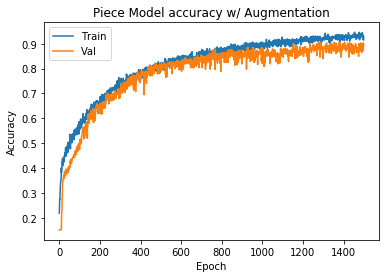

In [18]:
plt.plot(piece_hist.history['accuracy'])
plt.plot(piece_hist.history['val_accuracy'])
plt.title('Piece Model accuracy w/ Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

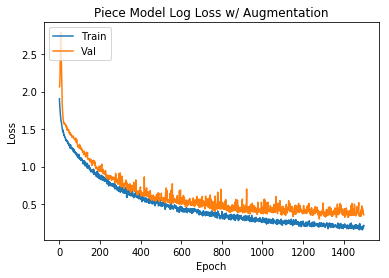

In [19]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Piece Model Log Loss w/ Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[40  1  3  1  2  0  0]
 [ 0 29  0  0  4  0  0]
 [ 2  0 56  0  2  1  0]
 [ 8  0  6 36  0  1  0]
 [ 0  3  0  0 27  2  0]
 [ 1  1  0  1  0 58  0]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


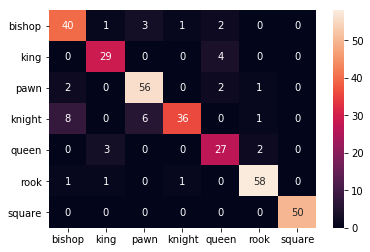

In [21]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

In [22]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

0.34240595798594936
